In [70]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

Text(0.5, 0, 'n')

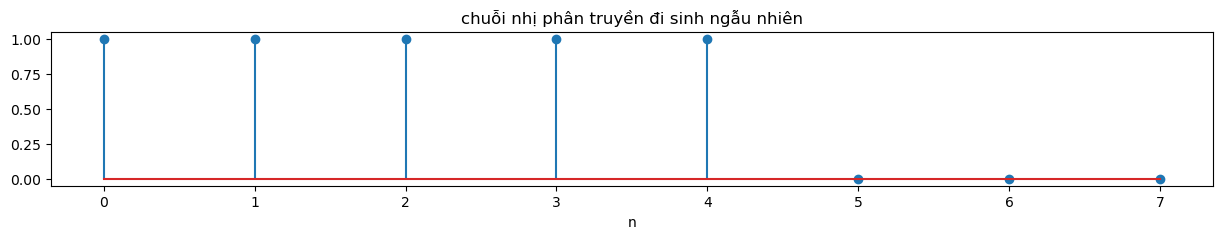

In [71]:
N = 8      # Số lượng bit
Tb = 1     # Thời gian truyền 1 bit
T = 1*N    # Thời gian lấy mẫu
t = np.arange(0, Tb, Tb/800)

def random_bits_array(n):   # hàm tạo mảng bit ngẫu nhiên
    return [random.randint(0, 1) for _ in range(n)]
    #tạo 1 mảng n bit ngẫu nhiên mỗi phần tử trong mảng là 0 hoặc 1 

m = random_bits_array(N) # mảng bit ngẫu nhiên

#Vẽ
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.stem(m)
ax.set_title('chuỗi nhị phân truyền đi sinh ngẫu nhiên')
ax.set_xlabel('n')

In [72]:
# Xung vuông
def xungvuong():
    out = []
    t = np.arange(0, Tb, Tb/100)
    
    for i in range(len(m)):
        if m[i] == 0:
            x = np.zeros(len(t))
        else:
            x = np.ones(len(t))
        out.extend(x)
    return out
xv = xungvuong()

Text(0, 0.5, 's(t)')

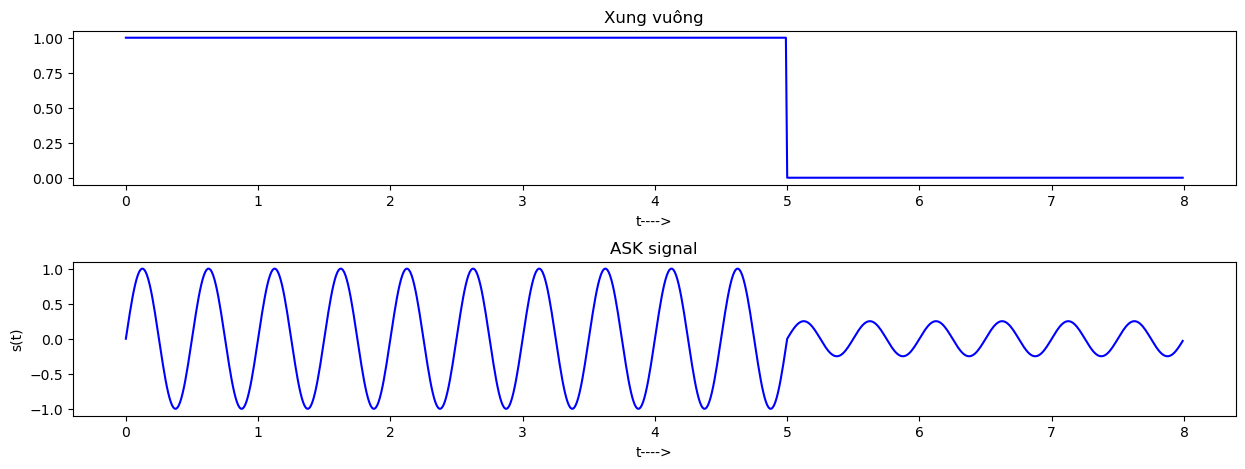

In [73]:
# Điều chế 2-ASK
# Modulation
f = 2    # Tần số sóng mang
A1 = 1    # Biên độ sóng mang ứng với bit 1
A2 = 0.25 # Biên độ sóng mang ứng với bit 0
def modulation():
    out = []
    f = 2    # Tần số sóng mang
    A1 = 1    # Biên độ sóng mang ứng với bit 1
    A2 = 0.25 # Biên độ sóng mang ứng với bit 0
    # Chùm tín hiệu M = {s1(t); s2(t)}  (k = 1)
    t = np.arange(0, Tb, Tb/100)
    s1 = A1 * np.sin(2 * np.pi * f * t)
    s2 = A2 * np.sin(2 * np.pi * f * t)
    # Cơ sở trực chuẩn ứng với chùm tín hiệu M: b(t) = \sqrt(2/T) * sin(2 * pi * f0 * t)
    for i in range(len(m)):
        if m[i] == 0:
            out.extend(s2)
        if m[i] == 1:
            out.extend(s1)
    return out
ask = modulation()
# Vẽ
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)
ax[0].plot(t,xv, 'b')
plt.setp(ax[0], xticks=[0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8], xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8'])
ax[0].set_title('Xung vuông')
ax[0].set_xlabel('t---->')
ax[1].plot(t,ask, 'b')
plt.setp(ax[1], xticks=[0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8], xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8'])
ax[1].set_title('ASK signal')
ax[1].set_xlabel('t---->')
ax[1].set_ylabel('s(t)')

Text(0, 0.5, 'r(t)')

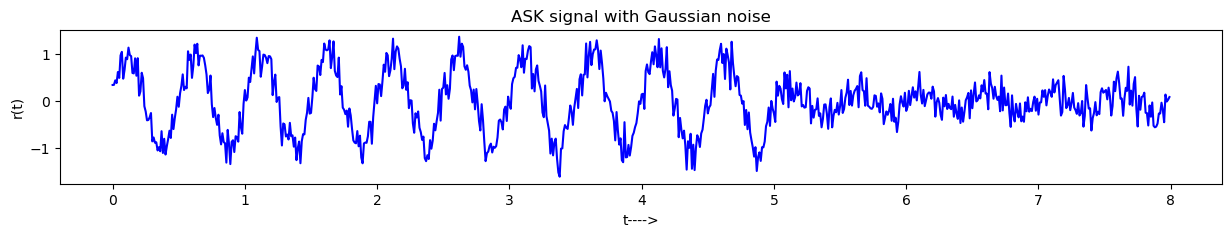

In [74]:
# AWGN Noise
N0 = 0.1
noise = np.random.normal(0, np.sqrt(N0/2), len(ask)) # Nhiễu Gauss với giá trị trung bình là 0, độ lệch chuẩn np.sqrt(N0/2)
ask_noisy = ask + noise

fig, ax = plt.subplots(1, 1, figsize=(15, 2))

#Vẽ
ax.figsize=(15, 5)
ax.plot(t, ask_noisy, 'b')
plt.setp(ax, xticks=[0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 8/8], xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8'])
ax.set_title('ASK signal with Gaussian noise')
ax.set_xlabel('t---->')
ax.set_ylabel('r(t)')


Text(0.5, 0, 'n')

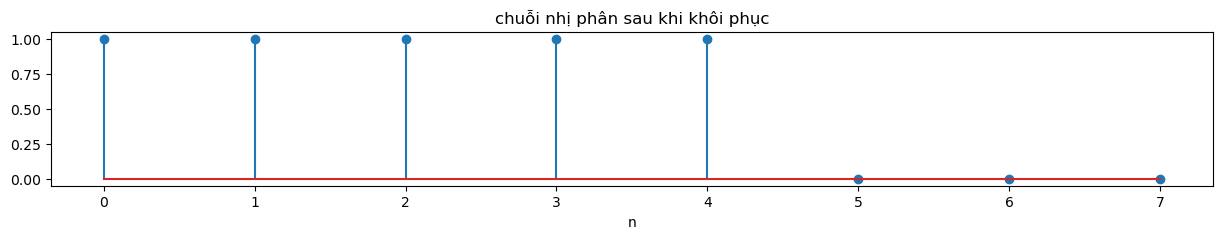

In [75]:
# Giải điều chế
def demodulation():
    t = np.arange(0, Tb, Tb/100)
    hx = math.sqrt(2/Tb)*np.sin(2 * np.pi * f * t)
    ask_noisy_list = np.array_split(ask_noisy, 8)
    output = []
    for i in range(len(ask_noisy_list)):
        if np.trapz(ask_noisy_list[i] * hx,t) >= np.sqrt(Tb/2)*(A1+A2)/2:
            output.append(1)
        else:
            output.append(0)
    return output

demod = demodulation()

#Vẽ
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
ax.stem(demod)
ax.set_title('chuỗi nhị phân sau khi khôi phục')
ax.set_xlabel('n') 
